$$ EN3160 \quad Assignment \quad 1\quad  on \quad Intensity  \quad Transformations  \quad and  \quad Neighborhood  \quad Filtering $$

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as math

$ Question \quad 1 $

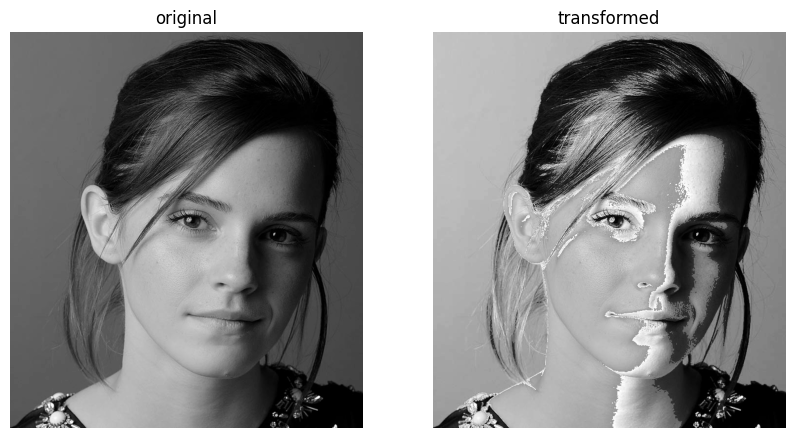

In [39]:
#import image
img_1 = cv.imread('emma.jpg' , cv.IMREAD_GRAYSCALE)
#trasformer
c = np.array([(50,50) ,(50,100), (150,255), (150,150), (255,255) ] )
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[1,1] ).astype('uint8')
t3 = np.linspace(c[3,1], c[4,1], 105).astype('uint8')
t = np.concatenate((t1,t2,t3), axis = 0)

#plot the graph

plt.plot(t)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

#apply the transformer

transformed_img_1 = cv.LUT(img_1, t)

#plot two images
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(img_1, cmap = 'gray')
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(transformed_img_1, cmap = 'gray')
plt.title('transformed')
plt.axis('off')
plt.show()




$ Question \quad 2 $

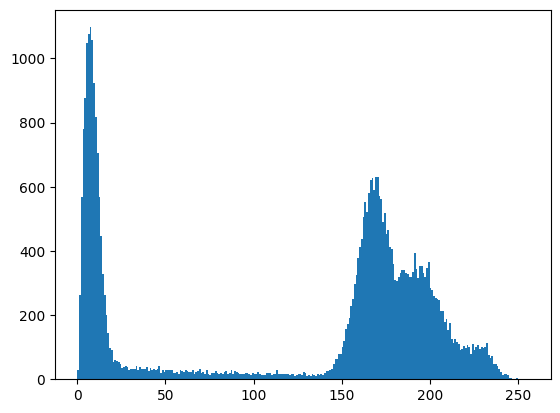

In [40]:
#load image
img_2 = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
#plot histrogram
plt.hist(img_2.ravel(), 256, [0,256])
plt.show()

(a) accentuate white matter

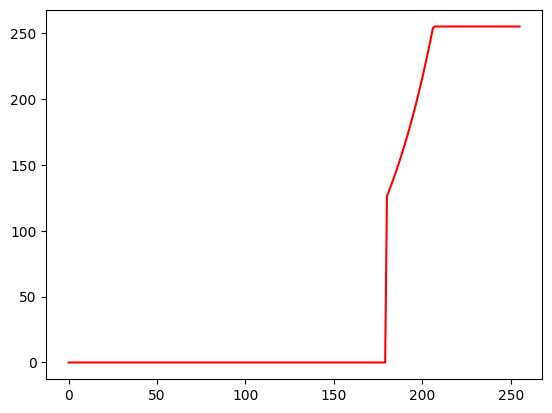

In [55]:
# tranformer 1
list_1 = np.arange(0,256)
# t_2 = 6**(0.015*list_1)
# t_2 = (t_2/np.max(t_2))*255

t_2 = np.zeros(256)

t_2[180:] = np.clip((6**(0.015*list_1[180:])),a_min=None , a_max=255)


img_2_transformed= cv.LUT(img_2, t_2.astype('uint8'))
plt.plot(list_1, t_2, 'r')

#plot two images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_2_transformed, cmap='gray')
plt.title('white matter Image')
plt.axis('off')
plt.show()



(b) accentuate gray matter

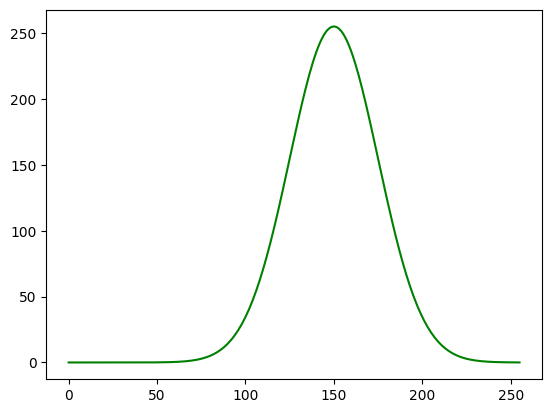

In [56]:
# tranformer 2
mean = 150
std_dev = 25  
x = np.linspace(0, 255, 256)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
t_3 = (y - np.min(y)) * 255 / (np.max(y) - np.min(y))

img_2_transformed_2= cv.LUT(img_2, t_3.astype('uint8')) 
plt.plot(list_1, t_3, 'g')

#plot two images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_2_transformed_2, cmap='gray')
plt.title('gray matter Image')
plt.axis('off')
plt.show()

$ Question \quad 3 $

In [46]:
# load the image in BGR format

img_3 = cv.imread('highlights_and_shadows.jpg' , cv.IMREAD_COLOR)
img_3_1 = cv.cvtColor(img_3, cv.COLOR_BGR2Lab)

L =cv.split(img_3_1)[0]

(a) gamma correction

In [49]:
gamma = 2.2
table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
L_corrected = cv.LUT(L, table)

img_3_gamma_corrected = cv.merge([L_corrected, cv.split(img_3_1)[1], cv.split(img_3_1)[2]])

(b) show the images and histograms

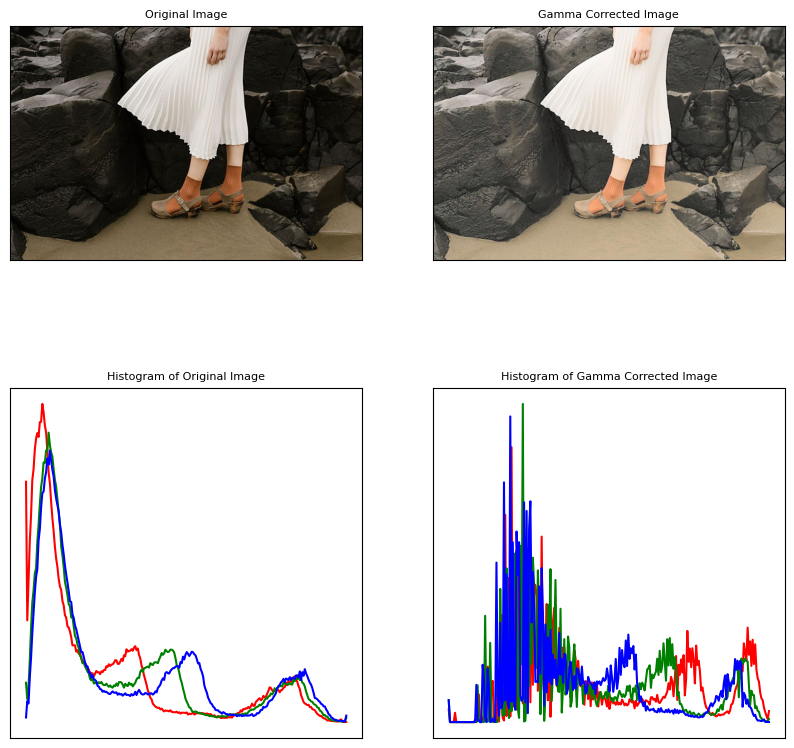

In [50]:
img_orig = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_3_gamma_corrected, cv.COLOR_Lab2RGB)

color = ('r' , 'g' , 'b')

f, axarr = plt.subplots(2,2)
f.set_size_inches(10,10)

axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('Original Image' , size = 8)
axarr[0,0].xaxis.set_visible(False)
axarr[0,0].yaxis.set_visible(False)

axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma Corrected Image' ,size = 8)
axarr[0,1].xaxis.set_visible(False)
axarr[0,1].yaxis.set_visible(False)

#plot histograms 

for i,c in enumerate (color):
    hist_original = cv.calcHist([img_3], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_original, color = c)

    hist_corrected = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_corrected, color = c)

axarr[1,0].set_title('Histogram of Original Image' , size = 8)
axarr[1,0].xaxis.set_visible(False)
axarr[1,0].yaxis.set_visible(False)

axarr[1,1].set_title('Histogram of Gamma Corrected Image', size = 8)
axarr[1,1].xaxis.set_visible(False)
axarr[1,1].yaxis.set_visible(False)

Suitable gamma value is $\quad \gamma $ $\quad$ =  $\quad$ 2.2 

$Question \quad 4 $

In [ ]:
# Load the image in BGR format
img_4 = cv.imread('spider.png', cv.IMREAD_COLOR)

(a) Split the image into hue , saturation and value planes

In [51]:
# Split the image
hue, saturation, value = cv.split(cv.cvtColor(img_4, cv.COLOR_BGR2HSV))

(b) tranformation function creating and applying

In [57]:
# Transformation function

def transform4(arr, a, zegma):
    transformed_arr = []
    for i in arr:
        tr_list = []
        for x in i:
            t = min(x + (a * 128) * np.exp((-1 * (x - 128) ** 2) / (2 * zegma ** 2)), 255)
            tr_list.append(t)
        #converted to uint8
        transformed_arr.append(np.array(tr_list))
    transformed_arr = np.array(transformed_arr).astype(np.uint8)      
    return transformed_arr  

# Transform the image
saturation_transformed = transform4(saturation, 0.4, 70)

(c) Suitable 'a' value is 0.4

(d) Recombine the seperated three planes

In [58]:
# Ensure all arrays have the same data type
hue = hue.astype(np.uint8)
value = value.astype(np.uint8)

# Merge the arrays
transformed_img_4 = cv.merge([hue, saturation_transformed, value])

(e) Display the original image, vibrance-enhanced image, and the intensity transformation

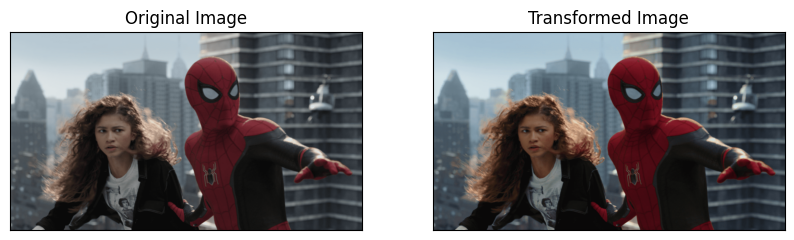

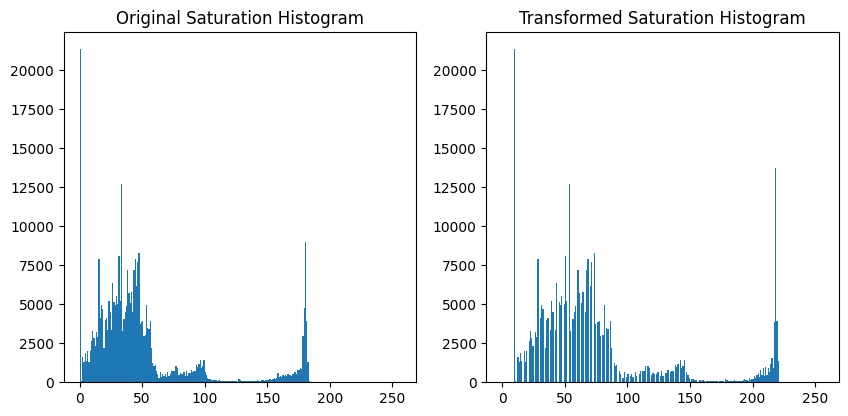

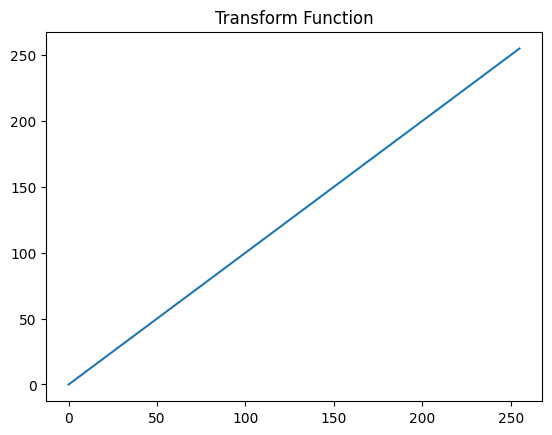

In [59]:
# Plot images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_4, cv.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(transformed_img_4, cv.COLOR_HSV2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Transformed Image')
plt.show()

# Plot histograms
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(saturation.ravel(), 256, [0, 256])
plt.title('Original Saturation Histogram')
plt.subplot(2, 2, 2)
plt.hist(saturation_transformed.ravel(), 256, [0, 256])
plt.title('Transformed Saturation Histogram')
plt.show()


#plot transform
list_t = np.arange(0,256)
transform_plt = []
for x in list_t:
    t = min(x + (0.5 / 128) * np.exp((-1 * (x - 128) ** 2) / (2 * 70 ** 2)), 255)
    transform_plt.append(t)
plt.plot(list_t, transform_plt)
plt.title('Transform Function')
plt.show()



$Question \quad 5$

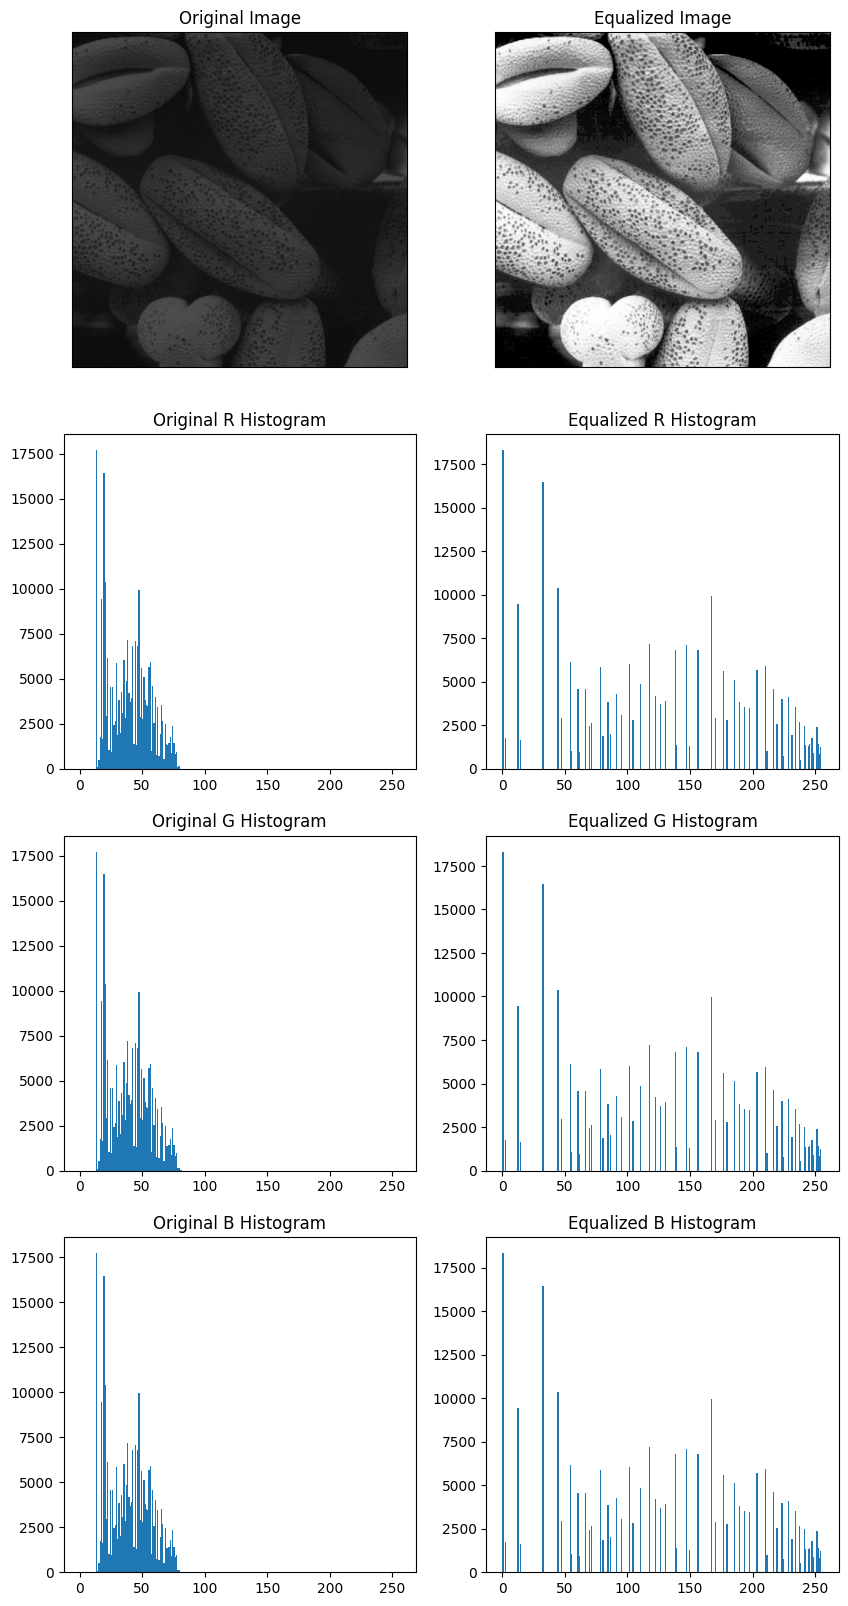

In [8]:
#load the image in BGR format
img_5 = cv.imread('shells.tif', cv.IMREAD_COLOR)

#contvert to RGB
img_5_cvt = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_5_1 = img_5_cvt.copy()

#histogram equalization
def hist_eq(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_img = cdf[img]
    return equalized_img


# equalize R plane
img_5_cvt[:,:,0] = hist_eq(img_5_cvt[:,:,0])
# equalize G plane
img_5_cvt[:,:,1] = hist_eq(img_5_cvt[:,:,1])
# equalize B plane 
img_5_cvt[:,:,2]= hist_eq(img_5_cvt[:,:,2])

# plot images
plt.figure(figsize=(10, 20))
plt.subplot(4, 2, 1)
plt.imshow(img_5_1)
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.subplot(4, 2, 2)
plt.imshow(img_5_cvt)
plt.xticks([])
plt.yticks([])
plt.title('Equalized Image')

# plot histograms plane by plane 
# r plane
plt.subplot(4, 2, 3)
plt.hist(img_5_1[:,:,0].ravel(), 256, [0, 256])
plt.title('Original R Histogram')
plt.subplot(4, 2, 4)
plt.hist(img_5_cvt[:,:,0].ravel(), 256, [0, 256])
plt.title('Equalized R Histogram')

# g plane
plt.subplot(4, 2, 5)
plt.hist(img_5_1[:,:,1].ravel(), 256, [0, 256])
plt.title('Original G Histogram')
plt.subplot(4, 2, 6)
plt.hist(img_5_cvt[:,:,1].ravel(), 256, [0, 256])
plt.title('Equalized G Histogram')

# b plane
plt.subplot(4, 2, 7)
plt.hist(img_5_1[:,:,2].ravel(), 256, [0, 256])
plt.title('Original B Histogram')
plt.subplot(4, 2, 8)
plt.hist(img_5_cvt[:,:,2].ravel(), 256, [0, 256])
plt.title('Equalized B Histogram')
plt.show()



$Question \quad6$

(a) Open the given image and split it in to hue, saturation and value planes and display each plane

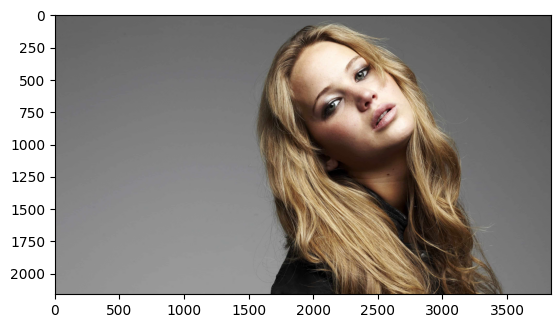

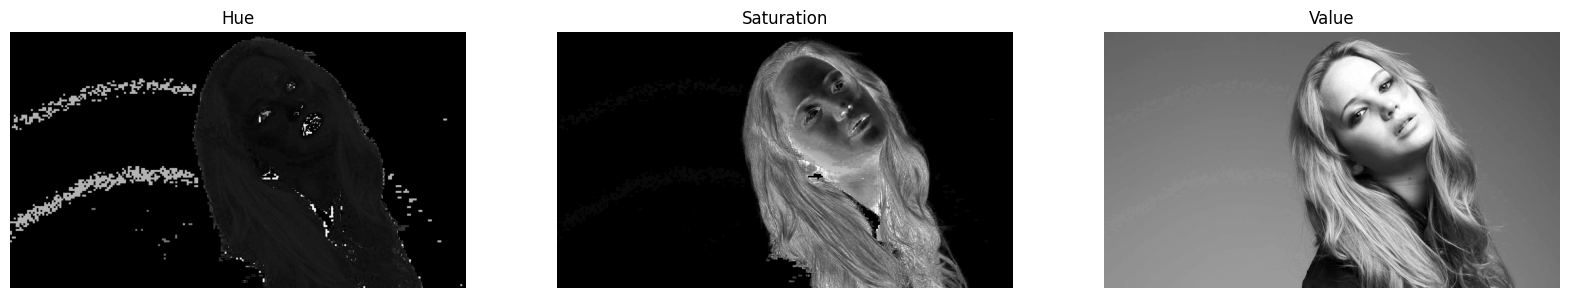

In [2]:
#load the image in BGR format
img_6 = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)

img_6_cvt = cv.cvtColor(img_6, cv.COLOR_BGR2RGB)
plt.imshow(img_6_cvt)

# split to hue ,saturation and value planes
hue_6,saturation_6,value_6 = cv.split(cv.cvtColor(img_6, cv.COLOR_BGR2HSV))

#diplay above three planes in gray scale
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(hue_6, cmap='gray')
plt.axis('off') 
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(saturation_6, cmap='gray')
plt.title('Saturation')
plt.axis('off') 
plt.subplot(1, 3, 3)
plt.imshow(value_6, cmap='gray')
plt.title('Value')
plt.axis('off') 
plt.show()


(b) Selecting thresholded mask

In [3]:
_, thresholded_mask = cv.threshold(saturation_6, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

(c) obtain foreground using bitwise_and operation and calculate histograms 

In [12]:
img_foreground = cv.bitwise_and(img_6, img_6, mask=thresholded_mask)
img_foreground = cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB)



# # calculate histogram of foreground 
# equalized_hist_foreground = np.zeros(img_foreground.shape, dtype='uint8')

# equalized_hist_foreground[:,:,0] = hist_eq(img_foreground[:,:,0])
# equalized_hist_foreground[:,:,1] = hist_eq(img_foreground[:,:,1])
# equalized_hist_foreground[:,:,2] = hist_eq(img_foreground[:,:,2])

# calculate histograms
hist_img_fg_r = cv.calcHist([img_foreground[:,:,0]], [0], None, [256], [0, 256])
hist_img_fg_g = cv.calcHist([img_foreground[:,:,1]], [0], None, [256], [0, 256])
hist_img_fg_b = cv.calcHist([img_foreground[:,:,2]], [0], None, [256], [0, 256])



(d) calculate cumlative sum

In [13]:
# calculate cumsum
cumsum_img_fg_r = np.cumsum(hist_img_fg_r)
cumsum_img_fg_g = np.cumsum(hist_img_fg_g)
cumsum_img_fg_b = np.cumsum(hist_img_fg_b)

(e) define histogram equalizer

In [15]:
def histogramEQ(cdf,img_plane):
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_img = cdf[img_plane]
    return equalized_img

# histogram Equalizer
equalized_hist_foreground = np.zeros(img_foreground.shape, dtype='uint8')

equalized_hist_foreground[:,:,0] = histogramEQ(cumsum_img_fg_r,img_foreground[:,:,0])
equalized_hist_foreground[:,:,1] = histogramEQ(cumsum_img_fg_g,img_foreground[:,:,1])
equalized_hist_foreground[:,:,2] = histogramEQ(cumsum_img_fg_b,img_foreground[:,:,2])

(f) Background extraction and obtain final image

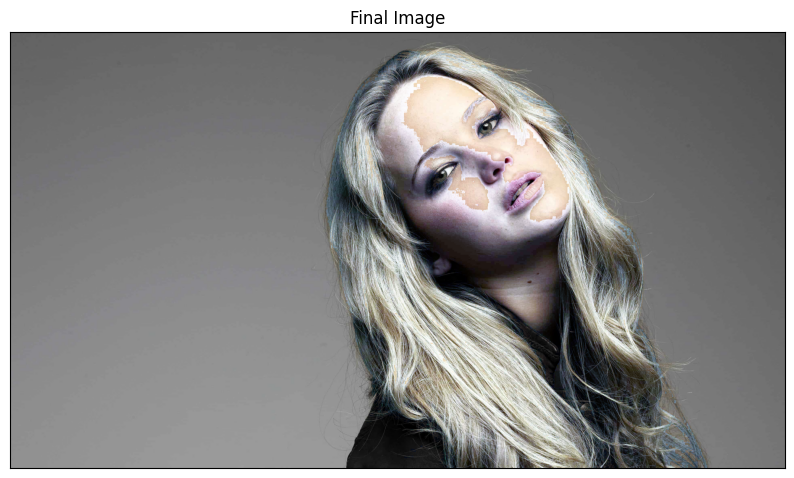

In [16]:
# background mask
background_mask = cv.bitwise_not(thresholded_mask)

# extract background pixels
background_pixels = cv.bitwise_and(img_6, img_6, mask=background_mask)
background_pixels = cv.cvtColor(background_pixels, cv.COLOR_BGR2RGB)

#obtain final image
final_image = cv.add(background_pixels, equalized_hist_foreground)

#plot final image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.xticks([])
plt.yticks([])
plt.title('Final Image')
plt.show()


$Question \quad 7$

In [66]:
# load the image in BGR format
img_7 = cv.imread('einstein.png', cv.IMREAD_COLOR)
img_7_1 = cv.cvtColor(img_7, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_7_1)
plt.title('Original Image')
plt.axis('off')



(-0.5, 363.5, 379.5, -0.5)

(a) Use cv.filter2D built in function 

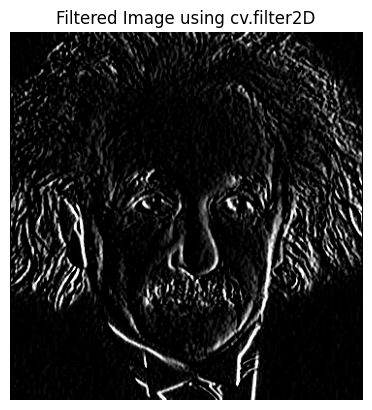

In [68]:
# using build in function

kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype= 'float')
img_7_filtered = cv.filter2D(img_7_1, -1, kernel)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_7_filtered)
plt.title('Filtered Image using cv.filter2D')
plt.axis('off')
plt.show()

(b) Using custom function 

(c) Using custom function with given property

In [70]:
# using function
img_7_copy = img_7_1.copy()

def sobel_filtering(image_plane):
    sobel_kernel_c = np.array([(1),(2),(1)], dtype= 'float')
    sobel_kernel_r = np.array([(1,0,-1)], dtype= 'float')
   
    # Create a padded version of the image
    image_plane = np.pad(image_plane, ((1,1), (1,1)), mode='constant')

    img_sobel_1 = np.zeros((image_plane.shape[0],image_plane.shape[1]-2))
    for i in range(img_sobel_1.shape[0]):
        for j in range(img_sobel_1.shape[1]):
            img_sobel_1[i,j] = np.abs(np.sum(sobel_kernel_r * image_plane[i,j:j+3]))
    
    img_sobel_filtered = np.zeros((img_sobel_1.shape[0]-2,img_sobel_1.shape[1]))

    for x in range(img_sobel_filtered.shape[1]):
        for y in range(img_sobel_filtered.shape[0]):
            img_sobel_filtered[y,x] = np.abs(np.sum(sobel_kernel_c * img_sobel_1[y:y+3,x]))
                       
    #img_sobel_filtered = np.clip(img_sobel_filtered, 0, 255)
    #img_sobel_filtered = np.pad(img_sobel_filtered, ((1, 1), (1, 1)), mode='constant')
    return  img_sobel_filtered

#filtering
img_7_copy[:,:,0] = sobel_filtering(img_7_copy[:,:,0])
img_7_copy[:,:,1] = sobel_filtering(img_7_copy[:,:,1])
img_7_copy[:,:,2] = sobel_filtering(img_7_copy[:,:,2])

img_7_filtered_2 = img_7_copy

#plot image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_7_filtered_2)
plt.axis('off')
plt.show()

$Question \quad 8
$

(a) Nearest-Neighbor Interpolation

In [3]:
# define zoom function using nearest neighbor method
def zoomNN(image,Scale_factor):
    rows, cols = image.shape[0]*Scale_factor , image.shape[1]*Scale_factor
    zoomed = np.zeros((rows,cols,3))
    for i in range(rows):
        for j in range(cols):
            zoomed[i][j] = image[i//Scale_factor][j//Scale_factor]
    zoomed = zoomed.astype('uint8')
    return zoomed

In [4]:
img_z_1 = cv.imread('zooming\im01small.png' , cv.IMREAD_COLOR)
#img_z_1_cvt = cv.cvtColor(img_z_1, cv.COLOR_BGR2RGB)
img_z_1_original = cv.imread('zooming\im01.png' , cv.IMREAD_COLOR)

#zoomed image
img_z_1_zoomed = zoomNN(img_z_1, 4)


# #show images
# cv.imshow('original image', img_z_1)
# cv.imshow('zoomed image', img_z_1_zoomed)
# cv.waitKey(0)
# cv.destroyAllWindows()

# compute normalized sum of squares difference of image
def norm_sum_squares(img):
    img = img.astype('float')
    img = img/255
    return np.sum(np.square(img - img_z_1_original/255)) / (img.shape[0] * img.shape[1])


print('SSD of zoomed',norm_sum_squares(img_z_1_zoomed))



SSD of zoomed 0.006286922675751488


(b) Bilinear Interpolation 

In [19]:
# define bilinaer Interpolation function
def zoomBI(image,Scale_factor):
    #scale the image
    rows, cols = image.shape[0]*Scale_factor , image.shape[1]*Scale_factor
    zoomed_image = np.zeros((rows,cols,3))
    
    for i in range(rows):
        for j in range(cols):
            x = i/Scale_factor
            y = j/Scale_factor
            x1 = math.floor(x)
            y1 = math.floor(y)
            x2 = min(math.ceil(x), len(image) - 1)
            y2 = min(math.ceil(y), len(image[0]) - 1)

            #calculate the value of the pixel using bilinear interpolation
            zoomed_image[i,j] = (
                image[x1,y1]*(x-x1)*(y-y1) + 
                image[x1,y2]*(x-x1)*(1-y+y1) + 
                image[x2,y1]*(1-x+x1)*(y-y1) + 
                image[x2,y2]*(1-x+x1)*(1-y+y1)
                )

    return zoomed_image.astype('uint8')

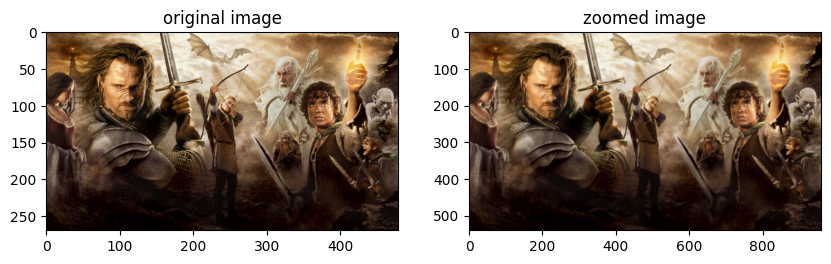

In [20]:
img_z_1 = cv.imread('zooming\im01small.png' , cv.IMREAD_COLOR)
img_z_1_cvt = cv.cvtColor(img_z_1, cv.COLOR_BGR2RGB)
img_z_1_original = cv.imread('zooming\im01.png' , cv.IMREAD_COLOR)
img_z_1_original_cvt = cv.cvtColor(img_z_1_original, cv.COLOR_BGR2RGB)
#zoomed image
img_z_1_zoomed = zoomBI(img_z_1, 2)
img_z_1_zoomed_cvt = cv.cvtColor(img_z_1_zoomed, cv.COLOR_BGR2RGB)

#plot images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_z_1_cvt)
plt.title('original image')
plt.subplot(1, 2, 2)
plt.imshow(img_z_1_zoomed_cvt)
plt.title('zoomed image')
plt.show()
